Decision Tree Performance:
Accuracy: 0.98
ROC-AUC Score (multi-class requires one-vs-rest setup): Not computed
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.92      0.96        24
           2       1.00      1.00      1.00        52

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100

--------------------------------------------------
Random Forest Performance:
Accuracy: 0.97
ROC-AUC Score (multi-class requires one-vs-rest setup): Not computed
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       1.00      0.88      0.93        24
           2       1.00      1.00      1.00        52

    accuracy                           0.97       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0

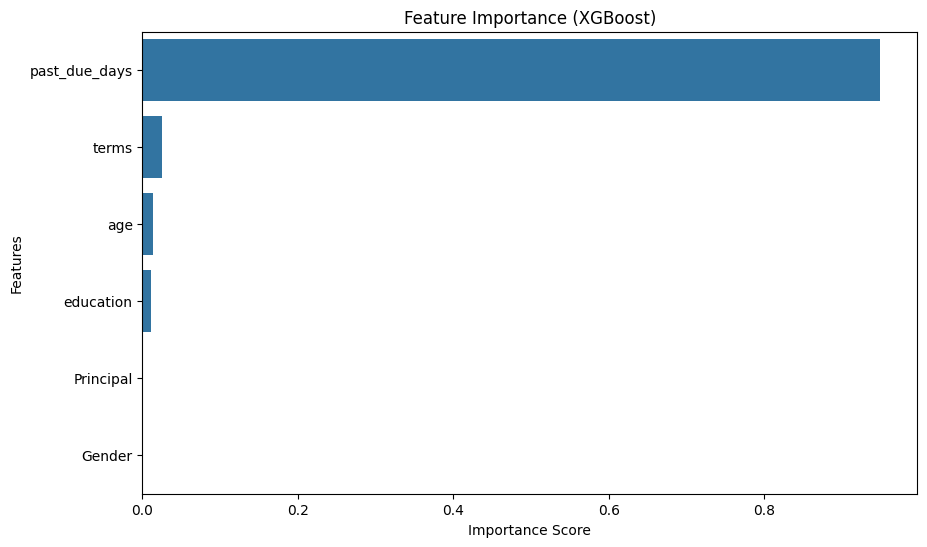

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

df = pd.read_csv("Loan.csv")

df.drop(columns=["Loan_ID", "effective_date", "due_date", "paid_off_time"], inplace=True)
df["past_due_days"] = df["past_due_days"].fillna(0)

def preprocess_data(df):
    label_encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

df, label_encoders = preprocess_data(df)

target_column = "loan_status"
X = df.drop(columns=[target_column])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

def evaluate_model(model_name, model, y_test, y_pred, X_test):
    print(f"{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    if len(np.unique(y_test)) > 2:
        print("ROC-AUC Score (multi-class requires one-vs-rest setup): Not computed")
    else:
        print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print(classification_report(y_test, y_pred))
    print("-" * 50)

evaluate_model("Decision Tree", dt, y_test, dt_pred, X_test)
evaluate_model("Random Forest", rf, y_test, rf_pred, X_test)
evaluate_model("XGBoost", xgb, y_test, xgb_pred, X_test)

feature_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
